In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import benchmarking

In [3]:
plt.style.use('../../iPyNotebook/default_colors.mplstyle')

In [4]:
fortran_O1 = np.load('./data/fortran_rk_O1.npy')
fortran_O2 = np.load('./data/fortran_rk_O2.npy')
fortran_O3 = np.load('./data/fortran_rk_O3.npy')
julia = np.load('./data/julia_rk.npy')

In [5]:
length = len(fortran_O1)
Ns = np.arange(1,length+1,1)

Text(0,0.5,'Time in seconds')

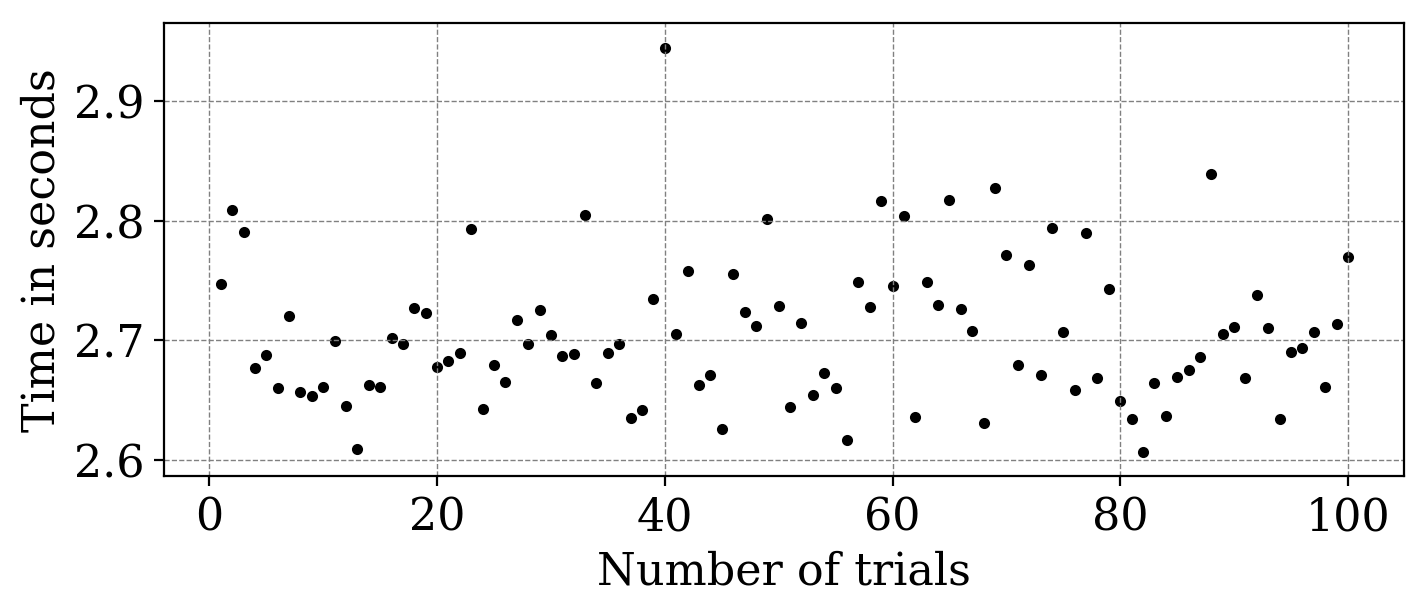

In [6]:
fig01 = plt.figure(1, figsize=(8, 3))
ax01 = fig01.add_subplot(1, 1, 1)

ax01.scatter(Ns, julia, color='k')

ax01.set_xlabel('Number of trials')
ax01.set_ylabel('Time in seconds')

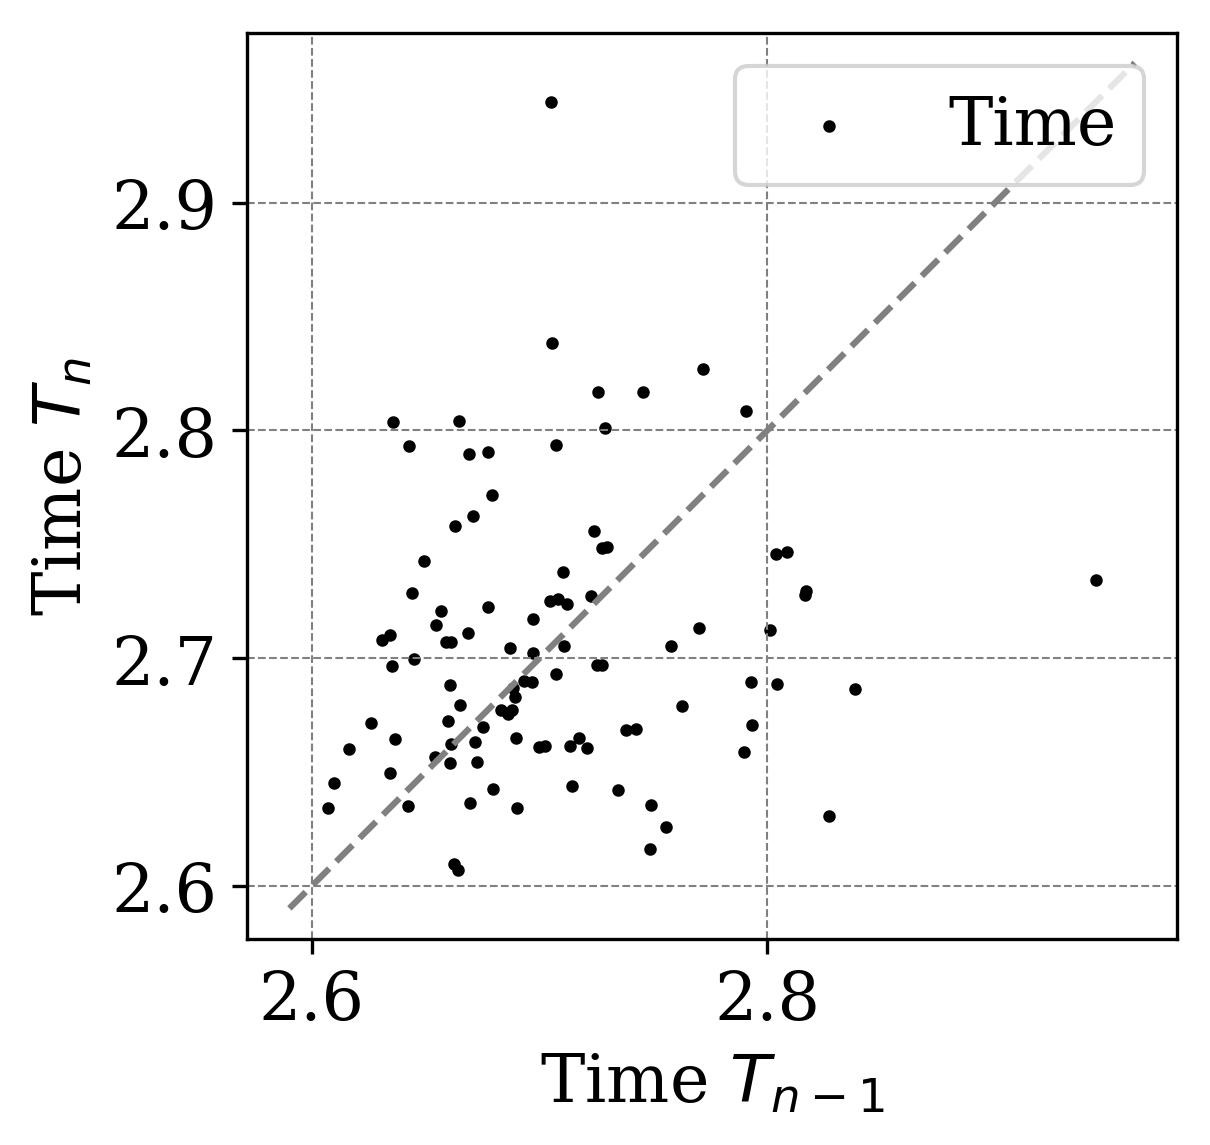

In [17]:
fig02 = plt.figure(2, dpi=300, figsize=(4, 4))

ax02 = fig02.add_subplot(1, 1, 1)
ax02.axis('equal')

ax02.scatter(julia[1:], julia[:-1], s=4, color='k', label='Time')

ax02.set_ylabel('Time $T_n$')
ax02.set_xlabel('Time $T_{n-1}$')
ax02.legend(loc='best')

ax02.plot(ax02.get_xlim(), ax02.get_ylim(), color='gray', ls='--')

In [27]:
lags = np.arange(1,60,1, dtype=np.int32)
acr = np.array([benchmarking.acorr(julia, lag) for lag in lags])

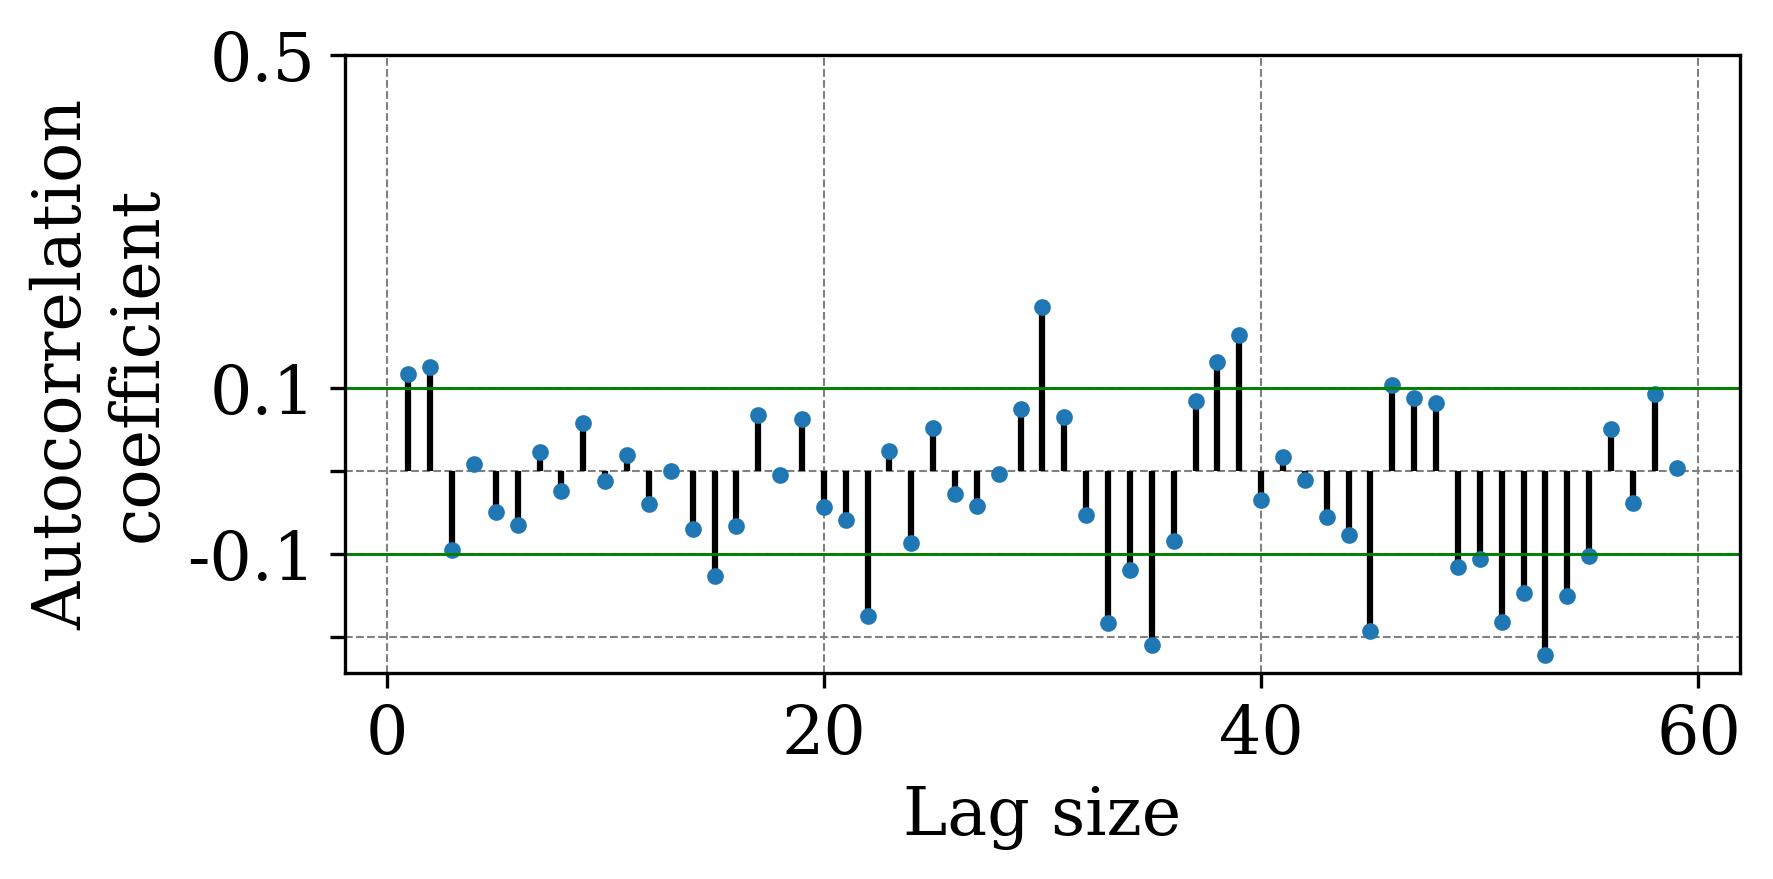

In [30]:
fig03 = plt.figure(3, dpi=300, figsize=(6, 6))

ax03 = fig03.add_subplot(2, 1, 1)

ax03.plot(lags, acr, linestyle='None', marker='o')
ax03.vlines(lags, 0, acr)

ax03.axhline(y=0.1, color='g', ls='-', lw=0.7)
ax03.axhline(y=-0.1, color='g', ls='-', lw=0.7)

ax03.set_ylabel("Autocorrelation\ncoefficient")
ax03.set_xlabel("Lag size")

ax03.set_yticks([-0.2, -0.1, 0, 0.1, 0.5])
ax03.set_yticklabels(['', '-0.1', '', '0.1', '0.5']);
# ax03.set_ylim(top=0.4, bottom=-0.4)

In [10]:
# Grand mean
M = [np.mean(fortran_O1), np.mean(fortran_O2), np.mean(fortran_O3), np.mean(julia)]
# Variance
V = [np.var(fortran_O1), np.var(fortran_O2), np.var(fortran_O3), np.var(julia)]

[Text(0,0,'-O1'), Text(0,0,'-O2'), Text(0,0,'-O3')]

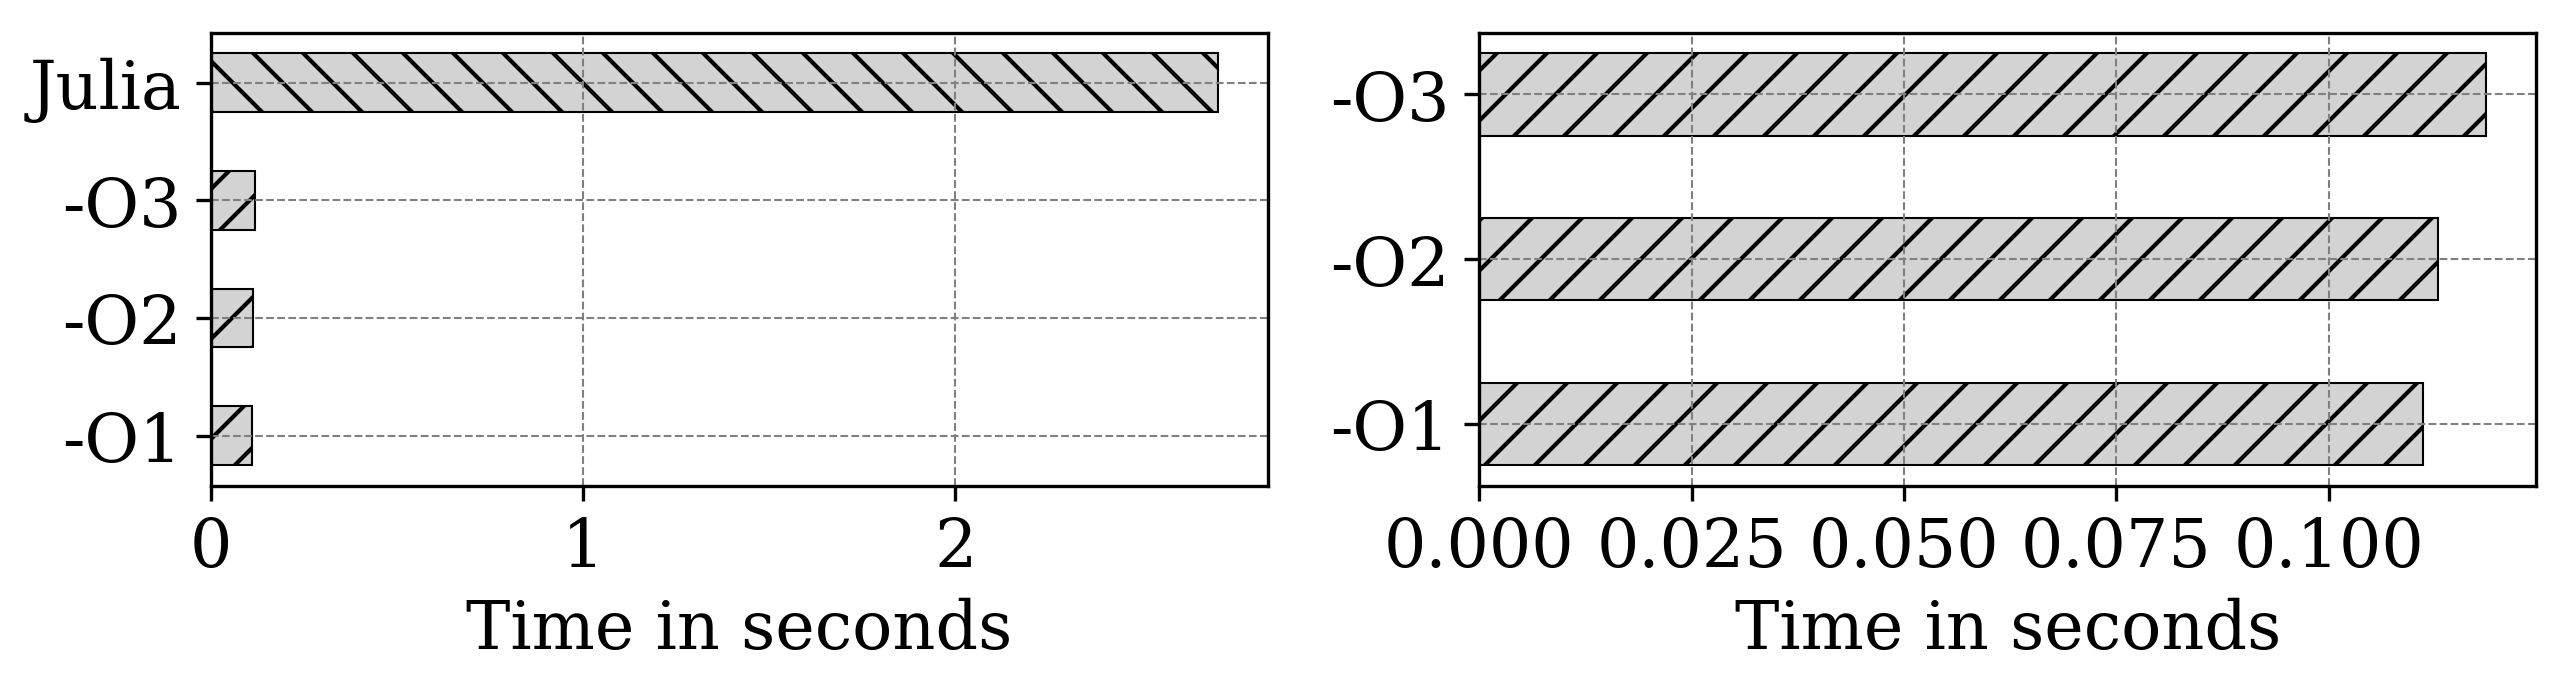

In [16]:
fig04 = plt.figure(4, dpi=300, figsize=(10, 2))

ax041 = fig04.add_subplot(1, 2, 1)
ax042 = fig04.add_subplot(1, 2, 2)

yticks = np.arange(len(M))

params = dict(height=0.5, color='lightgray', edgecolor='k', linewidth=0.5)
ax041.barh(yticks[-1], M[-1], label='', hatch=r'\\', **params)
ax041.barh(yticks[:-1], M[:-1], label='', hatch=r'//', **params)

ax042.barh(yticks[:-1], M[:-1], label='', hatch=r'//', **params)

ax041.set_xlabel('Time in seconds')
ax042.set_xlabel('Time in seconds')
# ax04.legend(loc='best', ncol=2, framealpha=0.5)

ax041.set_yticks(yticks)
ax041.set_yticklabels(['-O1', '-O2', '-O3', 'Julia'])

ax042.set_yticks(yticks[:-1])
ax042.set_yticklabels(['-O1', '-O2', '-O3'])
# ax042.set_ylabel('Optimization level')